In [1]:
from QCircuit import *
import numpy as np
from matplotlib import pyplot as plt
from scipy import constants
%matplotlib inline

In [2]:
sys = QCircuit()
sys.add_element(QJosephsonJunction('Q1JJ1'), ['GND', '1'])
sys.add_element(QJosephsonJunction('Q1JJ2'), ['1', '2'])
sys.add_element(QCapacitance('Q1C'), ['GND', '1'])
sys.add_element(QInductance('Q1L'), ['GND', '1'])

sys.add_element(QJosephsonJunction('Q2JJ1'), ['GND', '3'])
sys.add_element(QJosephsonJunction('Q2JJ2'), ['3', '4'])
sys.add_element(QCapacitance('Q2C'), ['GND', '3'])
sys.add_element(QInductance('Q2L', ['GND', '3']))

sys.add_element(QCapacitance('QCC'), ['1', '3'])
        
phi1 = QVariable('φ1')
phi2 = QVariable('φ2')
phix1 = QVariable('φx1')
phix2 = QVariable('φx2')

phi1.create_grid(32, 1)
phi2.create_grid(32, 1)

sys.add_variable(phi1)
sys.add_variable(phix1)
sys.add_variable(phi2)
sys.add_variable(phix2)


sys.map_nodes_linear(['GND', '1', '2', '3', '4'], 
                       ['φ1', 'φx1', 'φ2', 'φx2'], 
                       np.asarray([[0, 0, 0, 0], 
                                   [1, 0, 0, 0], 
                                   [0, 1, 0, 0], 
                                   [0, 0, 1, 0], 
                                   [0, 0, 0, 1]]))

EjEc_ratio = 80
flux_steps = 1
voltage_steps = 128

Ej1 = 10e9
Ej2 = 1e9
Ec = 200e6
Cc = Ec*10

sys.find_element('Q1JJ1').set_critical_current(Ej1)
sys.find_element('Q1JJ2').set_critical_current(Ej2)
sys.find_element('Q1C').set_capacitance(1/(8*Ec))

sys.find_element('Q2JJ1').set_critical_current(Ej1)
sys.find_element('Q2JJ2').set_critical_current(Ej2)
sys.find_element('Q2C').set_capacitance(1/(8*Ec))

sys.find_element('QCC').set_capacitance(1/(8*Cc))

phix1.set_parameter(0, 0)
phix2.set_parameter(0, 0)

sys.decompose([[phi1, phix1], [phi2, phix2]])

sys.solve_subsystems(5)

h = sys.interacting_subsystems_hamiltonian()

In [20]:
%%timeit
h = sys.interacting_subsystems_hamiltonian()

2.24 ms ± 151 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [3]:
sys.subsystems[0], sys.subsystems[1]

(QCircuit with 5 nodes, 7 elements, 2 variables and 2 parameters,
 QCircuit with 5 nodes, 7 elements, 2 variables and 2 parameters)

In [4]:
sys.subsystems[0].charge_operators

{'φ1': array([[-7.66488128e-15-2.45791151e-31j,  1.76685885e-15-1.14151203e+00j,
          4.84472111e-15+1.04447161e-14j, -2.65924764e-15-3.72171909e-02j,
          9.08422915e-16+3.02595911e-16j],
        [ 1.76685885e-15+1.14151203e+00j,  1.00339057e-14+1.33986443e-31j,
         -7.92413954e-16-1.56933983e+00j,  1.34688541e-15-5.03239621e-15j,
          3.45596712e-15+8.06660336e-02j],
        [ 4.84472111e-15-1.04447161e-14j, -7.92413954e-16+1.56933983e+00j,
         -5.39098518e-15-3.92337180e-31j, -1.17108065e-15+1.85822019e+00j,
          8.69242806e-15-7.22807966e-15j],
        [-2.65924764e-15+3.72171909e-02j,  1.23586311e-15+5.03239621e-15j,
         -1.17108065e-15-1.85822019e+00j,  1.40980421e-14-1.29530029e-31j,
          6.68815635e-15+2.05660951e+00j],
        [ 9.08422915e-16-3.02595911e-16j,  3.45596712e-15-8.06660336e-02j,
          8.63691691e-15+7.22807966e-15j,  6.68815635e-15-2.05660951e+00j,
         -2.10707444e-14+2.23855099e-31j]]),
 'φ2_imp': array([[0.+0.j, 

In [5]:
sys.subsystems[1].charge_operators

{'φ1_imp': array([[0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
        [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
        [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
        [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
        [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j]]),
 'φ2': array([[ 1.93055311e-15+4.59479603e-33j, -5.19294078e-16-1.14151203e+00j,
         -6.77928779e-15+2.24156497e-15j,  1.50701271e-15+3.72171909e-02j,
          8.27629404e-16+2.64745391e-16j],
        [-5.19294078e-16+1.14151203e+00j, -1.38011632e-14-6.75878908e-32j,
         -5.50368514e-15-1.56933983e+00j,  7.10658201e-15-1.68558033e-14j,
          2.98747807e-17+8.06660336e-02j],
        [-6.75151866e-15-2.24156497e-15j, -5.50368514e-15+1.56933983e+00j,
          1.07507049e-14+3.86069678e-31j,  6.54214488e-15-1.85822019e+00j,
          4.19155450e-15+7.08383732e-15j],
        [ 1.50701271e-15-3.72171909e-02j,  7.10658201e-15+1.68558033e-14j,
          6.54214488e-15+1.85822019e+00j,  3.68787377e-15+4.17134669e-31j,
   

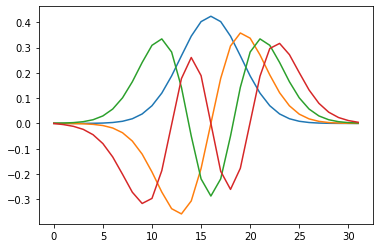

In [19]:
plt.plot(np.real(sys.subsystems[1].wavefunctions[...,0].ravel()))
plt.plot(np.real(sys.subsystems[1].wavefunctions[...,1].ravel()))
plt.plot(np.real(sys.subsystems[1].wavefunctions[...,2].ravel()))
plt.plot(np.real(sys.subsystems[1].wavefunctions[...,3].ravel()))

In [6]:
sys

QCircuit with 5 nodes, 7 elements, 2 variables and 2 parameters

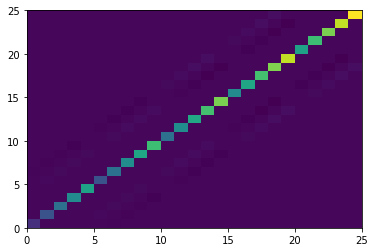

In [7]:
plt.pcolormesh(np.real(h))

In [8]:
sys.calculate_potentials()
e = np.real(sys.diagonalize_phase(num_states=16)[0])
e - e[0]

array([0.00000000e+00, 3.64604345e+09, 3.99390352e+09, 7.18238689e+09,
       7.43336290e+09, 7.89005604e+09, 1.05809089e+10, 1.07236888e+10,
       1.11597623e+10, 1.16748680e+10, 1.37624680e+10, 1.38101032e+10,
       1.43260385e+10, 1.47572833e+10, 1.53418304e+10, 1.66688370e+10])

In [9]:
e1 = np.linalg.eigh(h)[0]
e1 - e1[0]

array([0.00000000e+00, 3.64604395e+09, 3.99390364e+09, 7.18242175e+09,
       7.43340033e+09, 7.89006544e+09, 1.05812317e+10, 1.07239327e+10,
       1.11598194e+10, 1.16749519e+10, 1.37767021e+10, 1.38252607e+10,
       1.43285547e+10, 1.47590928e+10, 1.53426820e+10, 1.73578021e+10,
       1.76157374e+10, 1.82157167e+10, 1.88799159e+10, 2.08003319e+10,
       2.14096134e+10, 2.22512428e+10, 2.42475695e+10, 2.53747801e+10,
       2.79369012e+10])

In [10]:
sys.capacitance_matrix_legendre_transform()

array([[ 1.46666667e+09, -0.00000000e+00,  1.33333333e+08,
        -0.00000000e+00],
       [-0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
         0.00000000e+00],
       [ 1.33333333e+08, -0.00000000e+00,  1.46666667e+09,
        -0.00000000e+00],
       [-0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
         0.00000000e+00]])

In [11]:
sys.subsystems[0].capacitance_matrix_legendre_transform()

array([[ 1.46666667e+09, -0.00000000e+00,  1.33333333e+08,
        -0.00000000e+00],
       [-0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
         0.00000000e+00],
       [ 1.33333333e+08, -0.00000000e+00,  1.46666667e+09,
        -0.00000000e+00],
       [-0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
         0.00000000e+00]])